# <b><u> Project Title : Customer Segmentation. </u></b>

## <b> Problem Description </b>

>  In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
data=pd.read_excel("/content/drive/MyDrive/Almabetter /CapstoneProject/Capstone 4/Online Retail.xlsx")

In [6]:
print("Duplicate entry in data:",len(data[data.duplicated()])) #total number of duplicates

Duplicate entry in data: 5268


In [8]:
duplicate_data = data[data.duplicated(keep = 'last') ]
duplicate_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541640,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541644,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom
541646,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") #shape function given details of (Rows,Columns)

def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps
datainfo()

Total Rows and Columns in DataFrame is : (541909, 8) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
InvoiceNo,object,541909,25900,0,0.000000
StockCode,object,541909,4070,0,0.000000
Description,object,540455,4223,1454,0.268311
Quantity,int64,541909,722,0,0.000000
InvoiceDate,datetime64[ns],541909,23260,0,0.000000
UnitPrice,float64,541909,1630,0,0.000000
CustomerID,float64,406829,4372,135080,24.926694
Country,object,541909,38,0,0.000000


In [ ]:
# Filter out records with negative values
data = data[data['Quantity']>0]
data = data[data['UnitPrice']>0]

In [ ]:
# Drop duplicates rows from the data
country_cust_data=data[['Country','CustomerID']].drop_duplicates()

In [ ]:
#Customer distribution by country
cust_data=data.groupby("Country")["CustomerID"].count().reset_index().sort_values('CustomerID', ascending=False)
print(cust_data)

                 Country  CustomerID
36        United Kingdom      354321
14               Germany        9040
13                France        8341
10                  EIRE        7236
31                 Spain        2484
24           Netherlands        2359
3                Belgium        2031
33           Switzerland        1841
27              Portugal        1462
0              Australia        1182
25                Norway        1071
19                 Italy         758
6        Channel Islands         748
12               Finland         685
7                 Cyprus         614
32                Sweden         451
1                Austria         398
9                Denmark         380
26                Poland         330
20                 Japan         321
18                Israel         248
37           Unspecified         244
30             Singapore         222
17               Iceland         182
34                   USA         179
5                 Canada         151
1

In [ ]:
# Keep only Germany data
data = data[data["Country"] == 'Germany']

In [ ]:
#Check for missing values in the dataset
data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
#Add new column depicting total amount
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [ ]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
data.shape

(9040, 9)

In [ ]:
# Filtering the usefull columns
data=data[["CustomerID","InvoiceNo","InvoiceDate","TotalAmount","Country"]]

In [ ]:
data.tail()

,CustomerID,InvoiceNo,InvoiceDate,TotalAmount,Country
541801,12713.0,581578,2011-12-09 12:16:00,15.00,Germany
541802,12713.0,581578,2011-12-09 12:16:00,10.20,Germany
541803,12713.0,581578,2011-12-09 12:16:00,10.20,Germany
541804,12713.0,581578,2011-12-09 12:16:00,24.96,Germany
541805,12713.0,581578,2011-12-09 12:16:00,16.50,Germany


#RFM Modelling

In [ ]:
import datetime as dt
Latest_Date = dt.datetime(2011,12,10)
Latest_Date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:16:00')

In [ ]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of invoice no. of transaction(s),
# Monetary = Sum of Total Amount for each customer

import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                            'InvoiceNo': lambda x: len(x), 
                                            'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12426.0,194,30,582.73
1,12427.0,21,31,825.80
2,12468.0,187,38,729.54
3,12471.0,2,460,19824.05
4,12472.0,32,339,6572.11


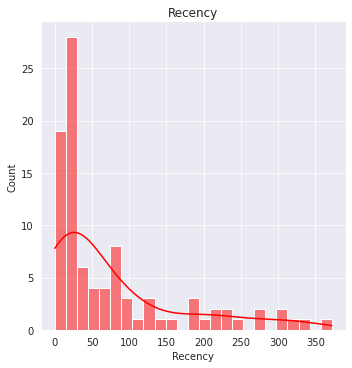

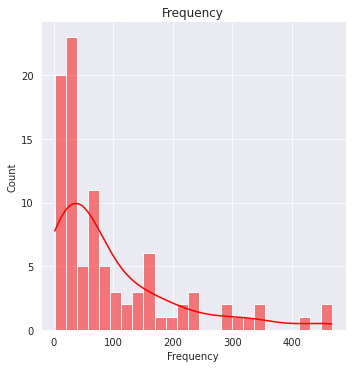

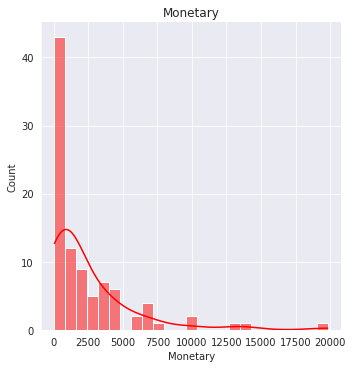

In [ ]:
# Recency,Frequency,Monetary histogram 
continuous_feature=["Recency","Frequency","Monetary"]

for feature in continuous_feature:
    dataset=RFMScores.copy()
    sns.displot(dataset[feature],kde=True,bins=25,color="r")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.25, 0.5: 30.5, 0.75: 92.0},
 'Frequency': {0.25: 23.25, 0.5: 55.0, 0.75: 141.25},
 'Monetary': {0.25: 530.1500000000001,
  0.5: 1066.1399999999999,
  0.75: 3328.6925}}

In [ ]:
#Functions to create R, F and M segments

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))        

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore
CustomerID,,,,,,,,,
12426.0,194,30,582.73,4,3,3,10,433,10
12427.0,21,31,825.80,2,3,3,8,233,8
12468.0,187,38,729.54,4,3,3,10,433,10
12471.0,2,460,19824.05,1,1,1,3,111,3
12472.0,32,339,6572.11,3,1,1,5,311,5


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore
CustomerID,,,,,,,,,
12426.0,194,30,582.73,4,3,3,10,433,10
12427.0,21,31,825.80,2,3,3,8,233,8
12468.0,187,38,729.54,4,3,3,10,433,10
12471.0,2,460,19824.05,1,1,1,3,111,3
12472.0,32,339,6572.11,3,1,1,5,311,5


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 3, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12426.0,194,30,582.73,4,3,3,10,433,10,Bronze
1,12427.0,21,31,825.80,2,3,3,8,233,8,Silver
2,12468.0,187,38,729.54,4,3,3,10,433,10,Bronze
3,12471.0,2,460,19824.05,1,1,1,3,111,3,Gold
4,12472.0,32,339,6572.11,3,1,1,5,311,5,Gold


In [ ]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 94 entries, 12426.0 to 14335.0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Recency            94 non-null     int64   
 1   Frequency          94 non-null     int64   
 2   Monetary           94 non-null     float64 
 3   R                  94 non-null     int64   
 4   F                  94 non-null     int64   
 5   M                  94 non-null     int64   
 6   RFGroup            94 non-null     int64   
 7   RFMGroup           94 non-null     object  
 8   RFMScore           94 non-null     int64   
 9   RFM_Loyalty_Level  94 non-null     category
dtypes: category(1), float64(1), int64(7), object(1)
memory usage: 7.6+ KB


In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12471.0,2,460,19824.05,1,1,1,3,111,3,Gold
1,12621.0,1,467,13689.67,1,1,1,3,111,3,Gold
2,12709.0,15,208,9736.52,1,1,1,3,111,3,Gold
3,12705.0,15,334,6868.29,1,1,1,3,111,3,Gold
4,12476.0,15,233,6816.42,1,1,1,3,111,3,Gold
5,12720.0,2,354,5781.73,1,1,1,3,111,3,Gold
6,12524.0,9,144,4485.72,1,1,1,3,111,3,Gold
7,12627.0,10,230,4478.53,1,1,1,3,111,3,Gold
8,12569.0,2,188,4124.69,1,1,1,3,111,3,Gold
9,12662.0,0,230,3849.78,1,1,1,3,111,3,Gold


In [ ]:
# Create a Function to plot different Scatter plots
def Scater_plot(A,B):
  sns.scatterplot(data=RFMScores, x=A, y=B, hue='RFM_Loyalty_Level',s=250)

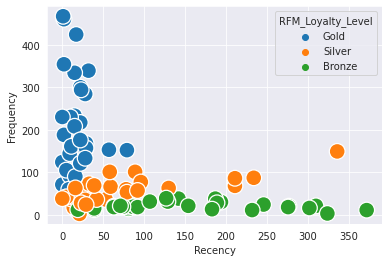

In [ ]:
Scater_plot('Recency','Frequency')

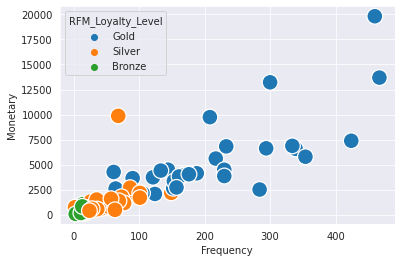

In [ ]:
Scater_plot('Frequency','Monetary')

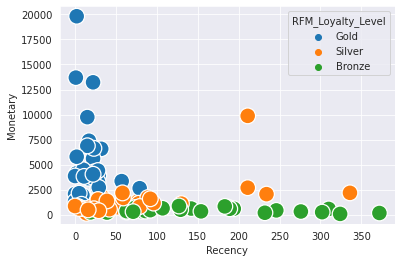

In [ ]:
Scater_plot('Recency','Monetary')

# Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">



Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation


## K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

Let's apply K-means clustering to the  dataset.

In [ ]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,,
12426.0,194,30,582.73,4,3,3,10,433,10,Bronze
12427.0,21,31,825.80,2,3,3,8,233,8,Silver
12468.0,187,38,729.54,4,3,3,10,433,10,Bronze
12471.0,2,460,19824.05,1,1,1,3,111,3,Gold
12472.0,32,339,6572.11,3,1,1,5,311,5,Gold
...,...,...,...,...,...,...,...,...,...,...
13814.0,92,57,1579.12,3,2,2,7,322,7,Silver
13815.0,22,176,4027.36,2,1,1,4,211,4,Gold
13816.0,23,28,571.67,2,3,3,8,233,8,Silver


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

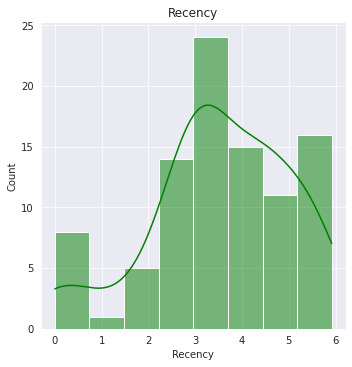

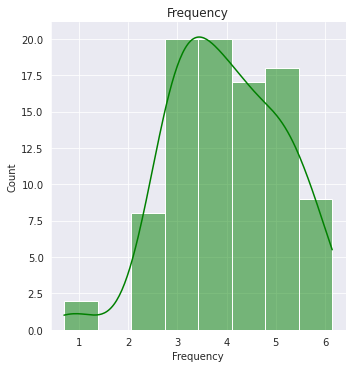

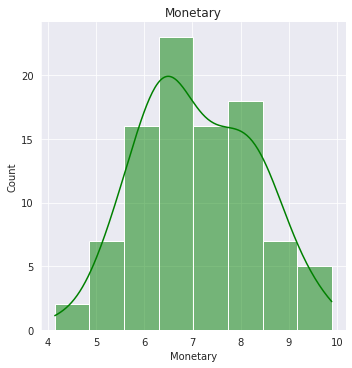

In [ ]:
# Recency,Frequency,Monetary histogram 
continuous_feature=["Recency","Frequency","Monetary"]

for feature in continuous_feature:
    dataset=Log_Data.copy()
    sns.displot(dataset[feature],kde=True,color="g")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Data.columns)

In [ ]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12426.0,1.174828,-0.530873,-0.615214
12427.0,-0.332179,-0.501364,-0.324992
12468.0,1.149745,-0.318946,-0.428404
12471.0,-1.926637,1.910308,2.326203
12472.0,-0.046776,1.637576,1.405499
...,...,...,...
13814.0,0.669103,0.043207,0.216256
13815.0,-0.300995,1.050977,0.996853
13816.0,-0.271166,-0.592573,-0.631059


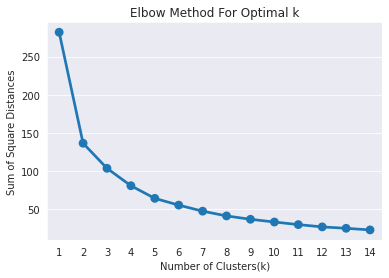

In [ ]:
from sklearn.cluster import KMeans

inertias = {}
for k in range(1,15):
    model = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000,random_state=42)
    model = model.fit(Scaled_Data)
    inertias [k] = model.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(inertias.keys()), y = list(inertias.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
model = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
model.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = model.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,,
12426.0,194,30,582.73,4,3,3,10,433,10,Bronze,1
12427.0,21,31,825.80,2,3,3,8,233,8,Silver,0
12468.0,187,38,729.54,4,3,3,10,433,10,Bronze,1
12471.0,2,460,19824.05,1,1,1,3,111,3,Gold,2
12472.0,32,339,6572.11,3,1,1,5,311,5,Gold,2


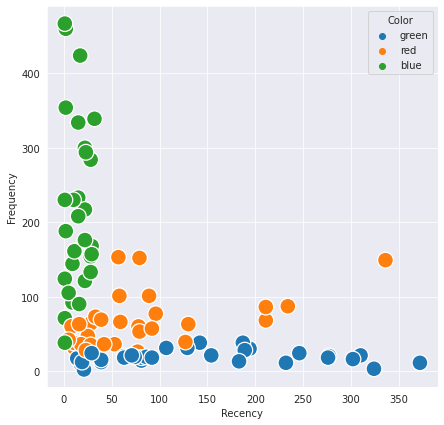

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
sns.scatterplot(data=RFMScores, x="Recency", y="Frequency", hue='Color',s=250)

In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFGroup,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,,
12426.0,194,30,582.73,4,3,3,10,433,10,Bronze,1,green
12427.0,21,31,825.80,2,3,3,8,233,8,Silver,0,red
12468.0,187,38,729.54,4,3,3,10,433,10,Bronze,1,green
12471.0,2,460,19824.05,1,1,1,3,111,3,Gold,2,blue
12472.0,32,339,6572.11,3,1,1,5,311,5,Gold,2,blue


## DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI


In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=2)
model.fit(Scaled_Data)

DBSCAN(min_samples=2)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [ ]:
model.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  1,  0, -1,  0,  0,
        1,  0,  0, -1, -1,  0,  0,  2, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1])

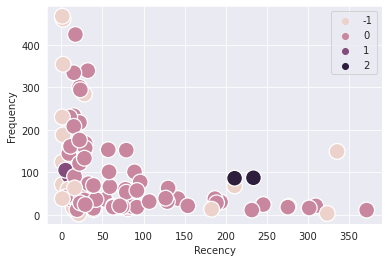

In [ ]:
sns.scatterplot(data=RFMScores, x='Recency', y='Frequency', hue=model.labels_,cmap = "viridis",s=250);

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

As We can see Dbscan is not giving a good result as compare to Kmean Clustering for this dataset.

## Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

The following topics were covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
-


Check out these resources to learn more:

- https://www.coursera.org/learn/machine-learning
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html